# Imports

In [1]:
import pandas as pd
import os
import numpy as np
from functools import reduce
import missingno as msno

c:\users\brian\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### List Files

In [2]:
PATH='./data/'
arr = os.listdir(PATH)
arr = [i for i in arr if i not in ['.ipynb_checkpoints','currencies']]
print(arr)

['CAC40_composite.csv', 'DAX30_composite.csv', 'dowjones_composite.csv', 'hangseng_composite.csv', 'nasdaq_composite.csv', 'nikkei225_composite.csv', 'nyse_composite.csv', 's&p500_VIX.csv']


### Create Dataframes

In [3]:
dataframes = []
for idx, val in enumerate(arr):
  value = val.replace("_composite","").replace(".csv","")
  result = pd.read_csv(f"{PATH}{val}")
  result.rename(columns={'Date': 'date'}, inplace=True)
#   try:
#     result = result.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
#   except:
#     pass
  for _val in [i for i in result.columns.tolist() if i not in 'date']:
    result.rename(columns={_val: f'{_val}_{value}'}, inplace=True)
#   result = result[[i for i in result.columns.tolist() if i not in ['']]]
  print(result.columns.tolist())
  dataframes.append(result)

['date', ' value_CAC40']
['date', ' value_DAX30']
['date', 'Open_dowjones', 'High_dowjones', 'Low_dowjones', 'Close_dowjones', 'Adj Close_dowjones', 'Volume_dowjones']
['date', ' value_hangseng']
['date', 'Open_nasdaq', 'High_nasdaq', 'Low_nasdaq', 'Close_nasdaq', 'Adj Close_nasdaq', 'Volume_nasdaq']
['date', ' value_nikkei225']
['date', 'Open_nyse', 'High_nyse', 'Low_nyse', 'Close_nyse', 'Adj Close_nyse', 'Volume_nyse']
['date', ' value_s&p500_VIX']


### Outer Join on Date

In [4]:
df = reduce(lambda  left,right: pd.merge(left,right,on=['date'],
                                            how='outer'), dataframes)

In [5]:
for column in df.columns.tolist():
  if 'Close' in column:
    if 'dowjones' not in column:
      df=df.drop(column,axis=1)
for column in df.columns.tolist():
  if 'Close' in column:
    if 'Adj' not in column:
      df=df.drop(column,axis=1)

In [6]:
df.describe()

,value_CAC40,value_DAX30,Open_dowjones,High_dowjones,Low_dowjones,Adj Close_dowjones,Volume_dowjones,value_hangseng,Open_nasdaq,High_nasdaq,Low_nasdaq,Volume_nasdaq,value_nikkei225,Open_nyse,High_nyse,Low_nyse,Volume_nyse,value_s&p500_VIX
count,7821.000000,7614.000000,10107.000000,10107.000000,10107.000000,10107.000000,1.010700e+04,8441.000000,12603.000000,12603.000000,12603.000000,1.260300e+04,17822.000000,13860.000000,13860.000000,13860.000000,1.386000e+04,7823.000000
mean,3837.585066,6226.590834,3132.852689,3163.194273,3102.310756,3133.582461,1.805920e+09,15074.357288,1905.072112,1917.557938,1890.738755,9.592309e+08,10062.440868,4381.143313,4397.104270,4363.463828,1.193835e+09,19.479204
std,1311.851723,3427.922254,2423.894883,2441.614630,2406.026991,2424.192236,2.089188e+09,8029.334583,2306.073876,2321.128933,2288.979096,1.039644e+09,8598.738996,3988.449235,4007.833978,3966.805533,1.816924e+09,8.110431
min,1441.000000,1322.700000,299.209991,302.279999,296.510010,299.440002,2.600000e+06,1894.900000,54.869999,54.869999,54.869999,0.000000e+00,85.250000,347.769989,347.769989,347.769989,0.000000e+00,9.140000
25%,2869.570100,3570.740075,1039.075012,1048.290039,1028.610046,1038.554993,1.863250e+08,9246.799800,247.319999,247.879998,247.100006,0.000000e+00,1514.957500,652.794998,652.794998,652.794998,0.000000e+00,13.660000
50%,3944.909900,5754.260050,2858.449951,2895.370117,2823.290039,2858.219971,1.061900e+09,14135.200200,1058.989990,1062.939941,1053.020020,4.706400e+08,8757.050000,2618.375000,2618.375000,2618.375000,0.000000e+00,17.470000
75%,4890.580100,8196.855000,4306.074951,4347.435058,4265.590088,4307.794922,3.350655e+09,22299.630900,2521.244995,2535.234985,2497.975097,1.835255e+09,16887.685000,7252.517456,7294.699951,7197.380005,2.596448e+09,22.895000
max,6922.330100,14049.530000,10344.179688,10366.629883,10285.719727,10354.179688,8.873542e+10,33154.120000,13681.209961,13728.980469,13463.660156,7.693430e+09,38915.870000,15102.530273,15129.120117,15037.290039,1.145623e+10,82.690000


#### View Null Values

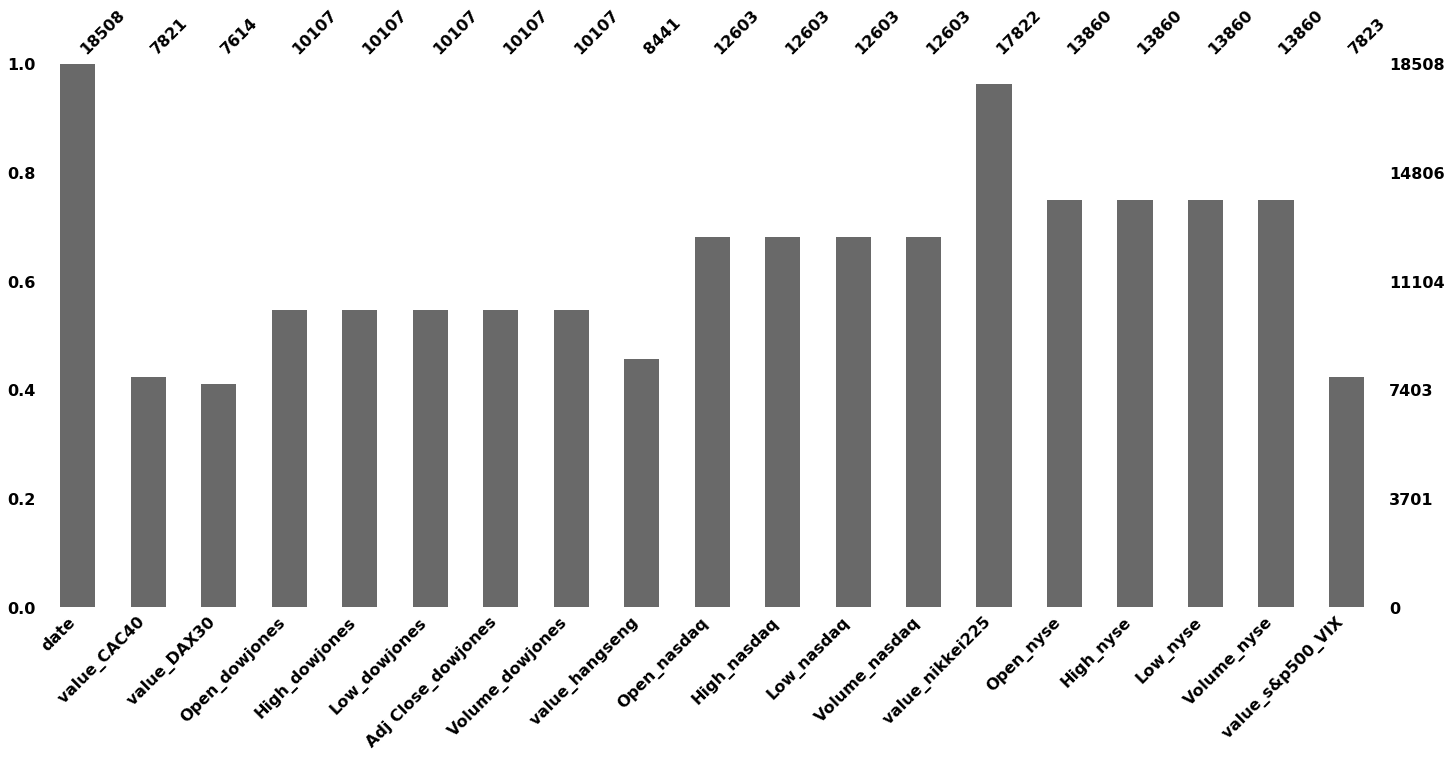

In [7]:
msno.bar(df)

### Impute missing values 

In [8]:
df['datetime'] = pd.to_datetime(df['date'])
df=df.drop('date',axis=1)

In [9]:
df=df.dropna(subset=['Adj Close_dowjones'])

In [10]:
df.tail()

,value_CAC40,value_DAX30,Open_dowjones,High_dowjones,Low_dowjones,Adj Close_dowjones,Volume_dowjones,value_hangseng,Open_nasdaq,High_nasdaq,Low_nasdaq,Volume_nasdaq,value_nikkei225,Open_nyse,High_nyse,Low_nyse,Volume_nyse,value_s&p500_VIX,datetime
10278,NaN,NaN,8816.299805,8868.919922,8757.959961,8816.580078,2.997950e+09,NaN,7969.370117,8017.149902,7965.899902,1.776060e+09,22217.90,12900.410156,12920.820313,12886.799805,2.997950e+09,12.42,2019-04-22
10279,NaN,NaN,8836.990234,8892.959961,8726.669922,8751.330078,3.645850e+09,NaN,8132.930176,8146.000000,8048.229980,2.247420e+09,NaN,13066.080078,13069.089844,12944.940430,3.645850e+09,14.80,2019-05-01
10280,NaN,NaN,9381.040039,9404.620117,9375.839844,9403.950195,2.160680e+09,NaN,8970.209961,9022.459961,8968.459961,1.634920e+09,23924.92,13911.160156,13941.559570,13895.200195,2.160680e+09,12.65,2019-12-26
10281,NaN,NaN,7792.959961,7792.959961,7580.649902,7650.629883,5.274310e+09,NaN,8127.689941,8200.440430,8035.950195,3.146860e+09,19043.40,11136.610352,11136.610352,10817.150391,5.274310e+09,41.17,2020-04-13
10282,NaN,NaN,7779.839844,7779.839844,7631.330078,7658.990234,4.753160e+09,NaN,8681.290039,8754.459961,8566.839844,3.722520e+09,19619.35,11158.870117,11187.769531,11011.459961,4.753160e+09,37.19,2020-05-01


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [12]:
df=df.sort_values('datetime',ascending=True)

c:\users\brian\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\brian\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\brian\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


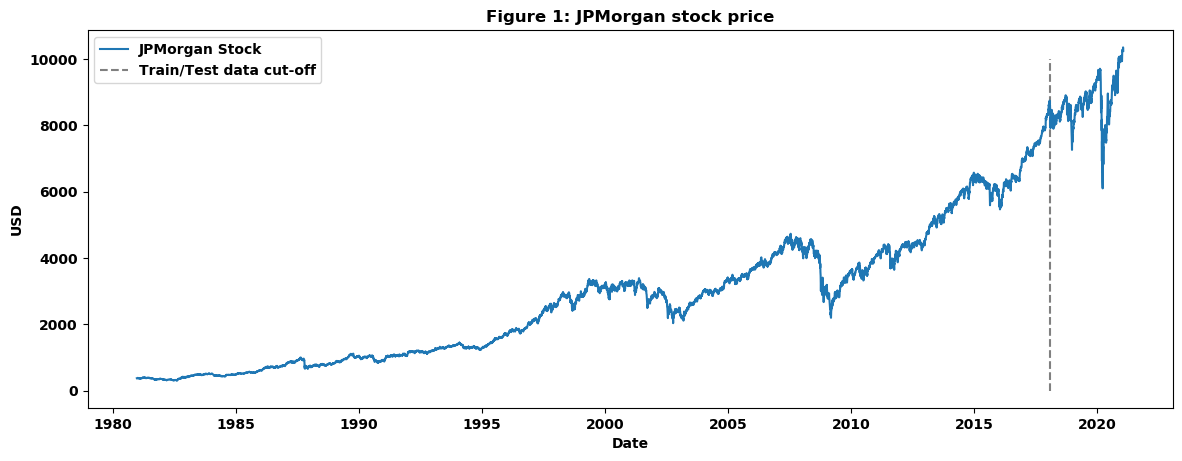

In [13]:
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(df.datetime, df['Adj Close_dowjones'], label='JPMorgan Stock')
plt.vlines(datetime.date(2018,1, 27), 0, 10000, linestyles='--', colors='gray', label='Train/Test data cut-off')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 1: JPMorgan stock price')
plt.legend()
plt.show()

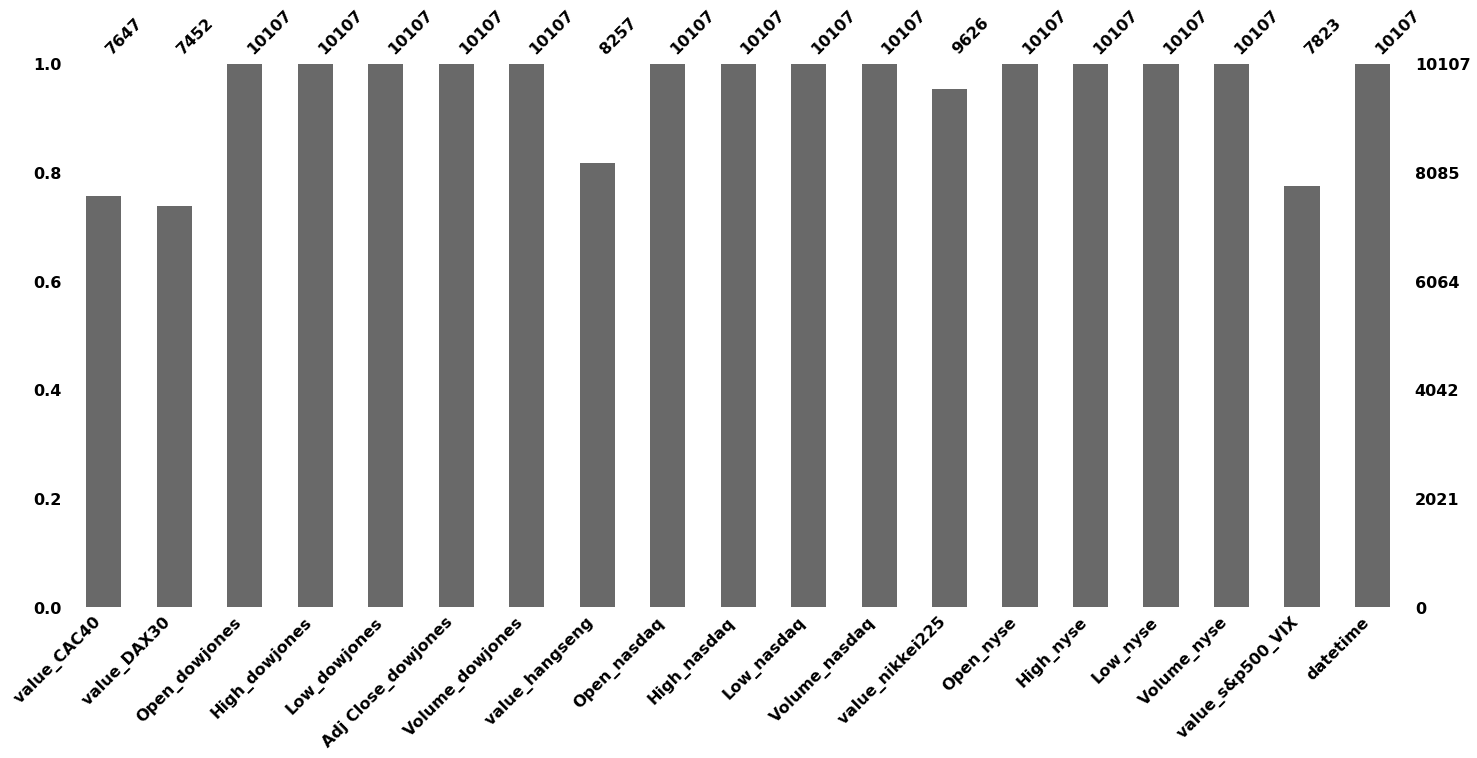

In [14]:
msno.bar(df)

In [15]:
df.head()

,value_CAC40,value_DAX30,Open_dowjones,High_dowjones,Low_dowjones,Adj Close_dowjones,Volume_dowjones,value_hangseng,Open_nasdaq,High_nasdaq,Low_nasdaq,Volume_nasdaq,value_nikkei225,Open_nyse,High_nyse,Low_nyse,Volume_nyse,value_s&p500_VIX,datetime
7875,NaN,NaN,375.529999,378.890015,369.510010,372.899994,55260000.0,NaN,199.860001,199.860001,199.860001,0.0,7023.57,820.940002,820.940002,820.940002,0.0,NaN,1980-12-23
7876,NaN,NaN,372.299988,376.070007,369.510010,374.040009,29490000.0,NaN,200.139999,200.139999,200.139999,0.0,7042.00,824.219971,824.219971,824.219971,0.0,NaN,1980-12-24
7877,NaN,NaN,374.470001,377.149994,372.299988,375.619995,16130000.0,NaN,201.279999,201.279999,201.279999,0.0,7063.13,827.710022,827.710022,827.710022,0.0,NaN,1980-12-26
7878,NaN,NaN,376.079987,377.950012,370.059998,371.549988,36060000.0,NaN,199.839996,199.839996,199.839996,0.0,NaN,818.830017,818.830017,818.830017,0.0,NaN,1980-12-29
7879,NaN,NaN,370.910004,375.250000,368.690002,372.369995,39750000.0,NaN,200.460007,200.460007,200.460007,0.0,NaN,820.309998,820.309998,820.309998,0.0,NaN,1980-12-30


c:\users\brian\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\brian\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\brian\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


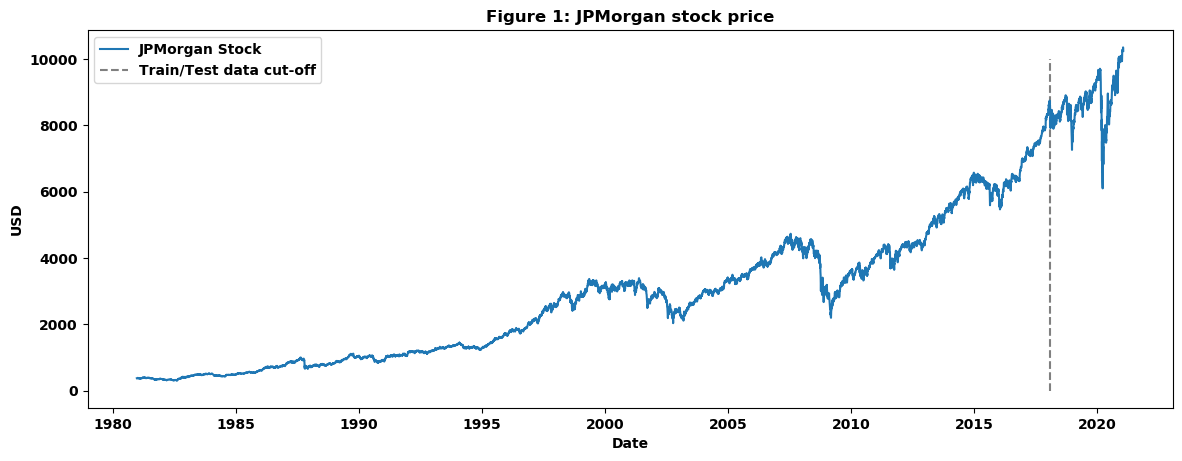

In [16]:
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(df.datetime, df['Adj Close_dowjones'], label='JPMorgan Stock')
plt.vlines(datetime.date(2018,1, 27), 0, 10000, linestyles='--', colors='gray', label='Train/Test data cut-off')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 1: JPMorgan stock price')
plt.legend()
plt.show()

In [17]:
df.index = df['datetime']

In [18]:
df.head()

,value_CAC40,value_DAX30,Open_dowjones,High_dowjones,Low_dowjones,Adj Close_dowjones,Volume_dowjones,value_hangseng,Open_nasdaq,High_nasdaq,Low_nasdaq,Volume_nasdaq,value_nikkei225,Open_nyse,High_nyse,Low_nyse,Volume_nyse,value_s&p500_VIX,datetime
datetime,,,,,,,,,,,,,,,,,,,
1980-12-23,NaN,NaN,375.529999,378.890015,369.510010,372.899994,55260000.0,NaN,199.860001,199.860001,199.860001,0.0,7023.57,820.940002,820.940002,820.940002,0.0,NaN,1980-12-23
1980-12-24,NaN,NaN,372.299988,376.070007,369.510010,374.040009,29490000.0,NaN,200.139999,200.139999,200.139999,0.0,7042.00,824.219971,824.219971,824.219971,0.0,NaN,1980-12-24
1980-12-26,NaN,NaN,374.470001,377.149994,372.299988,375.619995,16130000.0,NaN,201.279999,201.279999,201.279999,0.0,7063.13,827.710022,827.710022,827.710022,0.0,NaN,1980-12-26
1980-12-29,NaN,NaN,376.079987,377.950012,370.059998,371.549988,36060000.0,NaN,199.839996,199.839996,199.839996,0.0,NaN,818.830017,818.830017,818.830017,0.0,NaN,1980-12-29
1980-12-30,NaN,NaN,370.910004,375.250000,368.690002,372.369995,39750000.0,NaN,200.460007,200.460007,200.460007,0.0,NaN,820.309998,820.309998,820.309998,0.0,NaN,1980-12-30


In [47]:
df=df.dropna()

In [48]:
df.rename(columns={'Adj Close_dowjones': 'price'}, inplace=True)

C:\Users\Brian\Anaconda3\envs\thesis\lib\site-packages\pandas\core\frame.py:4446: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [49]:
dataset=df

In [50]:
# Create 7 and 21 days Moving Average
dataset['ma7'] = dataset['price'].rolling(window=7).mean()
dataset['ma21'] = dataset['price'].rolling(window=21).mean()

# Create MACD
dataset['26ema'] = dataset['price'].ewm(span=26).mean()
dataset['12ema'] = dataset['price'].ewm(span=12).mean()
dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

print("yay")
# Create Bollinger Bands
dataset['20sd'] = dataset['price'].rolling(window=20).std()
dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
print("yay")
# Create Exponential moving average
dataset['ema'] = dataset['price'].ewm(com=0.5).mean()

# Create Momentum
dataset['momentum'] = dataset['price']-1

yay


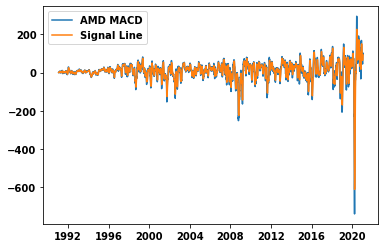

In [52]:
plt.plot(df.datetime, dataset['MACD'], label='AMD MACD')
plt.plot(df.datetime, exp3, label='Signal Line')
plt.legend(loc='upper left')
plt.show()

yay
yay
